## FILE READING

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = r"D:\ML\train.csv"

In [4]:
df = pd.read_csv(path)

## Basic Data Quality Checks

In [5]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [6]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [7]:
df.columns =['id', 'Product ID', 'Type', 'Air temperature ',
       'Process temperature ', 'Rotational speed ', 'Torque ',
       'Tool wear ', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    136429 non-null  int64  
 1   Product ID            136429 non-null  object 
 2   Type                  136429 non-null  object 
 3   Air temperature       136429 non-null  float64
 4   Process temperature   136429 non-null  float64
 5   Rotational speed      136429 non-null  int64  
 6   Torque                136429 non-null  float64
 7   Tool wear             136429 non-null  int64  
 8   Machine failure       136429 non-null  int64  
 9   TWF                   136429 non-null  int64  
 10  HDF                   136429 non-null  int64  
 11  PWF                   136429 non-null  int64  
 12  OSF                   136429 non-null  int64  
 13  RNF                   136429 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 14.

In [9]:
df.isnull().sum()

id                      0
Product ID              0
Type                    0
Air temperature         0
Process temperature     0
Rotational speed        0
Torque                  0
Tool wear               0
Machine failure         0
TWF                     0
HDF                     0
PWF                     0
OSF                     0
RNF                     0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

## SEPRATION OF X & Y

In [11]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature ', 'Process temperature ',
       'Rotational speed ', 'Torque ', 'Tool wear ', 'Machine failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [12]:
x = df.drop(['id', 'Product ID' , 'Machine failure'] , axis = 1)
y = df['Machine failure']

In [13]:
x.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

## CATEGORICAL & NUMERICAL DATA SEPERATION

In [15]:
cat = x.columns[x.dtypes == 'object']
num = x.columns[x.dtypes != 'object']

In [16]:
print(cat)
print("----------------")
print(num)

Index(['Type'], dtype='object')
----------------
Index(['Air temperature ', 'Process temperature ', 'Rotational speed ',
       'Torque ', 'Tool wear ', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


In [17]:
x['Type'].isnull().sum()

np.int64(0)

## CREATE PIPELINE

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [19]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   
    ('scaler', StandardScaler())                        
])


cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent' )),
    ('encoder', OrdinalEncoder())      
])

In [20]:
## Combine all Pipelines
pre =  ColumnTransformer([ ('num' ,  num_pipeline , num  ) ,
                    ('cat' , cat_pipeline , cat) ])

In [21]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


## APPLY TO DATA

In [22]:
x_scaled = pre.fit_transform(x)

In [23]:
x_scaled

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]], shape=(136429, 11))

In [24]:
x_scaled = pd.DataFrame(x_scaled , columns = x.columns)

In [25]:
x_scaled.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0



## FEATURE SELECTION METHOD

In [26]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(x_scaled , y , n_jobs = -1)

In [27]:
mi

array([0.00546557, 0.00216443, 0.01912578, 0.01975685, 0.00625449,
       0.0073581 , 0.0242671 , 0.01102809, 0.01927858, 0.00141059,
       0.01115051])

In [28]:
mi = pd.Series(mi)

In [29]:
mi.index = x_scaled.columns

In [30]:
mi =  mi.sort_values()

In [31]:
mi

OSF                     0.001411
Air temperature         0.002164
Type                    0.005466
Torque                  0.006254
Tool wear               0.007358
HDF                     0.011028
RNF                     0.011151
Process temperature     0.019126
PWF                     0.019279
Rotational speed        0.019757
TWF                     0.024267
dtype: float64

<Axes: >

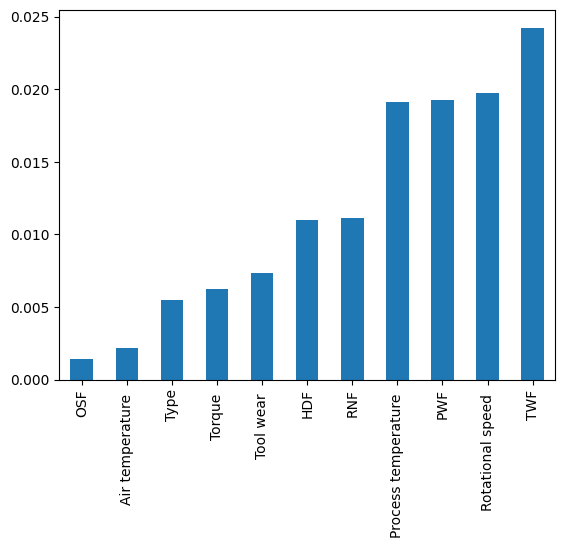

In [32]:
mi.plot(kind = 'bar')

## TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection  import train_test_split
f